In [ ]:
!pip install vbeam pyuff_ustb matplotlib

Let's explore the apodization values and wavefront delays of a PWI setup. vbeam provides some helpful plotting methods.

First, we import our dataset:

In [1]:
from pyuff_ustb import Uff

from vbeam.data_importers import import_pyuff
from vbeam.util.download import cached_download

data_url = "http://www.ustb.no/datasets/PICMUS_carotid_cross.uff"
uff = Uff(cached_download(data_url))
channel_data = uff.read("/channel_data")
scan = uff.read("/scan")
setup = import_pyuff(channel_data, scan, frames=0)

/home/magnusk/pyuff/pyuff_ustb/objects/point.py:60: RuntimeWarning: invalid value encountered in multiply
  return self.distance * np.sin(self.elevation)
/home/magnusk/pyuff/pyuff_ustb/objects/point.py:56: RuntimeWarning: invalid value encountered in multiply
  return self.distance * np.sin(self.azimuth) * np.cos(self.elevation)


# Plotting the receive apodization
Calling `setup.plot_apodization` on our imported setup will plot the values for all pixels in our scan. We can select just a single receiver by using the `slice` property on our `setup` object. If we don't slice the setup before plotting we get the average apodization values.

/home/magnusk/vbeam/vbeam/data_importers/setup.py:55: UserWarning: point_position will be overwritten by the scan.
  warnings.warn("point_position will be overwritten by the scan.")


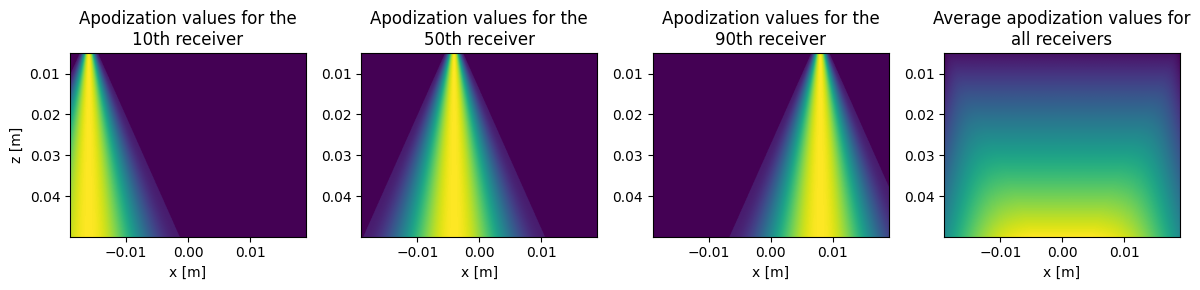

In [2]:
import matplotlib.pyplot as plt

# Let's only plot the receive apodization
receive_apodization = setup.apodization.receive

fig, ax = plt.subplots(ncols=4, figsize=(12, 3))
setup.slice["receivers", 10].plot_apodization(receive_apodization, ax=ax[0])
setup.slice["receivers", 50].plot_apodization(receive_apodization, ax=ax[1])
setup.slice["receivers", 90].plot_apodization(receive_apodization, ax=ax[2])
setup.plot_apodization(receive_apodization, ax=ax[3])
ax[0].set_title("Apodization values for the\n10th receiver")
ax[1].set_title("Apodization values for the\n50th receiver")
ax[2].set_title("Apodization values for the\n90th receiver")
ax[3].set_title("Average apodization values for\nall receivers")
ax[0].set_ylabel("z [m]")
for a in ax:
    a.set_xlabel("x [m]")
fig.tight_layout()

# Plotting the transmit apodization

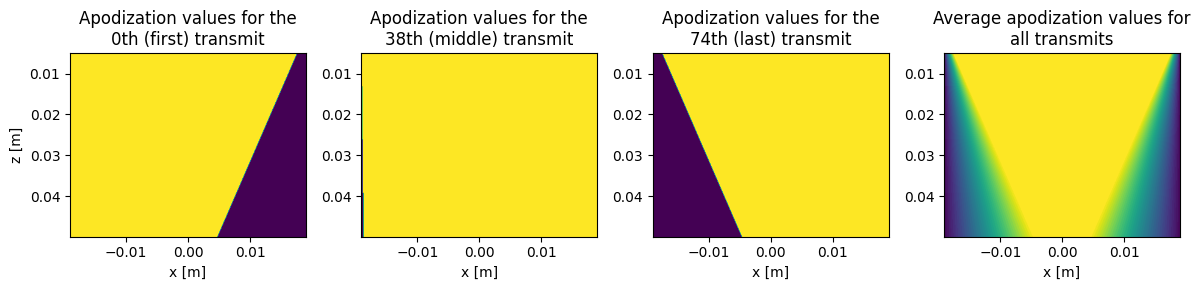

In [3]:
import matplotlib.pyplot as plt

# Let's only plot the transmit apodization
transmit_apodization = setup.apodization.transmit

fig, ax = plt.subplots(ncols=4, figsize=(12, 3))
setup.slice["transmits", 0].plot_apodization(transmit_apodization, ax=ax[0])
setup.slice["transmits", 38].plot_apodization(transmit_apodization, ax=ax[1])
setup.slice["transmits", 74].plot_apodization(transmit_apodization, ax=ax[2])
setup.plot_apodization(transmit_apodization, ax=ax[3])
ax[0].set_title("Apodization values for the\n0th (first) transmit")
ax[1].set_title("Apodization values for the\n38th (middle) transmit")
ax[2].set_title("Apodization values for the\n74th (last) transmit")
ax[3].set_title("Average apodization values for\nall transmits")
ax[0].set_ylabel("z [m]")
for a in ax:
    a.set_xlabel("x [m]")
fig.tight_layout()

By default, `setup.plot_apodization()` takes the average apodization values. Since our apodization function is combined for transmit and receive, this will be averaged over all receivers and all transmits.

Plotting this gives us an indication of how much signal is summed for each pixel.

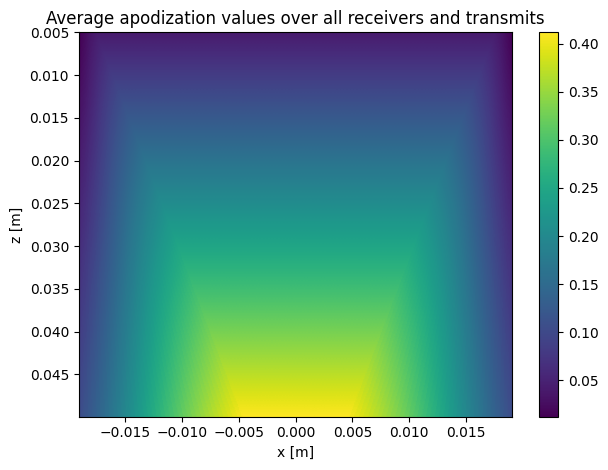

In [4]:
plt.figure()
setup.plot_apodization()
plt.title("Average apodization values over all receivers and transmits")
plt.ylabel("z [m]")
plt.xlabel("x [m]")
plt.colorbar()
plt.tight_layout()


# Plotting the delay values
In vbeam, we split the delay calculation into transmit and receive (since receive is usually just the distance from a point to a given receiver). We can plot the transmitted wavefront delay values using `setup.plot_transmitted_wavefront()`. In this case, the plots show the time that the transmitted plane wave reached a given pixel for the first, middle, and last transmitted wave.

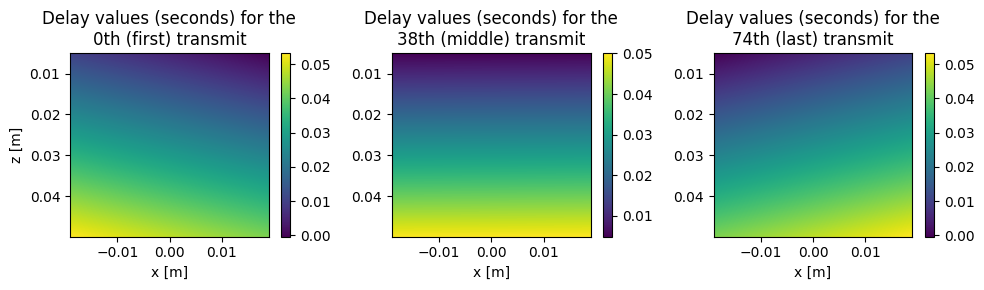

In [5]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 3))
im0 = setup.slice["transmits", 0].plot_transmitted_wavefront(ax=ax[0])
im1 = setup.slice["transmits", 38].plot_transmitted_wavefront(ax=ax[1])
im2 = setup.slice["transmits", 74].plot_transmitted_wavefront(ax=ax[2])
ax[0].set_title("Delay values (seconds) for the\n0th (first) transmit")
ax[1].set_title("Delay values (seconds) for the\n38th (middle) transmit")
ax[2].set_title("Delay values (seconds) for the\n74th (last) transmit")
ax[0].set_ylabel("z [m]")
for a in ax:
    a.set_xlabel("x [m]")
fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])
fig.tight_layout()

We can similarly plot the reflected wavefront delay values. These plots shows how long it takes a wave to be reflected from a given point back to a given element.

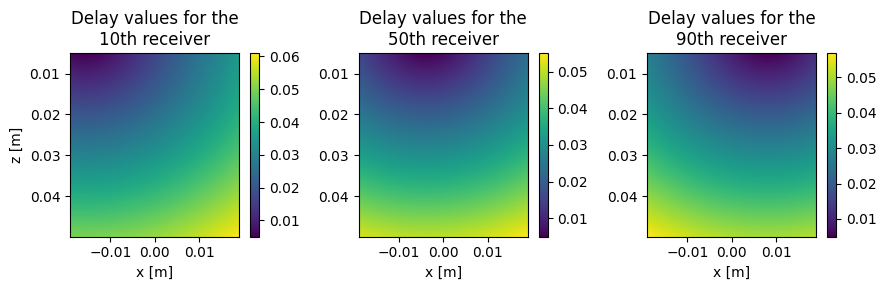

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(9, 3))
im0 = setup.slice["receivers", 10].plot_reflected_wavefront(ax=ax[0])
im1 = setup.slice["receivers", 50].plot_reflected_wavefront(ax=ax[1])
im2 = setup.slice["receivers", 90].plot_reflected_wavefront(ax=ax[2])
ax[0].set_title("Delay values for the\n10th receiver")
ax[1].set_title("Delay values for the\n50th receiver")
ax[2].set_title("Delay values for the\n90th receiver")
ax[0].set_ylabel("z [m]")
for a in ax:
    a.set_xlabel("x [m]")
fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])
fig.tight_layout()

# Visualizing a focused transmit dataset
Let's see what the apodization- and delay-values of a focused transmit dataset looks like.

In [12]:
import pyuff_ustb as pyuff
import numpy as np

from vbeam.data_importers import import_pyuff
from vbeam.scan import sector_scan
from vbeam.util.download import cached_download

# Download and read the channel data
data_url = "http://www.ustb.no/datasets/Verasonics_P2-4_parasternal_long_small.uff"
uff = pyuff.Uff(cached_download(data_url))
channel_data = uff.read("/channel_data")
setup = import_pyuff(channel_data, frames=0)

# Define and set a custom sector scan
scan_angles = np.array([wave.source.azimuth for wave in channel_data.sequence])
scan_depths = np.linspace(0, 110e-3, 512)
scan = sector_scan(scan_angles, scan_depths).resize(azimuths=256)
setup.scan = scan

# Plotting the RTB transmit apodization values

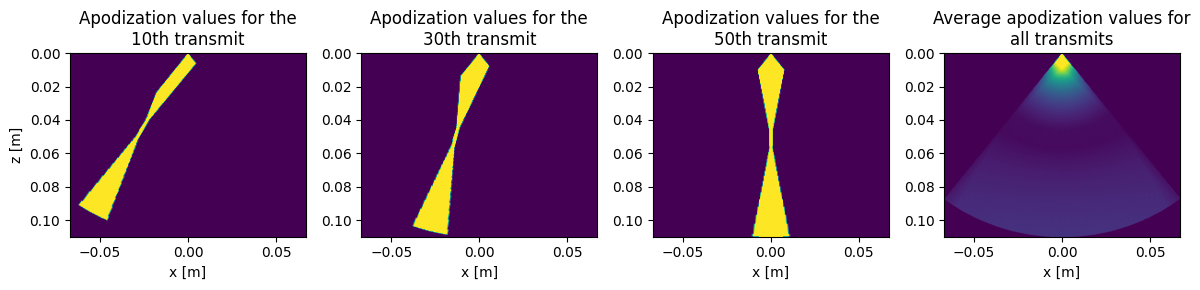

In [15]:
import matplotlib.pyplot as plt

# Let's only plot the transmit apodization
transmit_apodization = setup.apodization.transmit

fig, ax = plt.subplots(ncols=4, figsize=(12, 3))
setup.slice["transmits", 10].plot_apodization(transmit_apodization, postprocess=scan.scan_convert, ax=ax[0])
setup.slice["transmits", 30].plot_apodization(transmit_apodization, postprocess=scan.scan_convert, ax=ax[1])
setup.slice["transmits", 50].plot_apodization(transmit_apodization, postprocess=scan.scan_convert, ax=ax[2])
setup.plot_apodization(transmit_apodization, postprocess=scan.scan_convert, ax=ax[3])
ax[0].set_title("Apodization values for the\n10th transmit")
ax[1].set_title("Apodization values for the\n30th transmit")
ax[2].set_title("Apodization values for the\n50th transmit")
ax[3].set_title("Average apodization values for\nall transmits")
ax[0].set_ylabel("z [m]")
for a in ax:
    a.set_xlabel("x [m]")
fig.tight_layout()

# Plotting the delay values

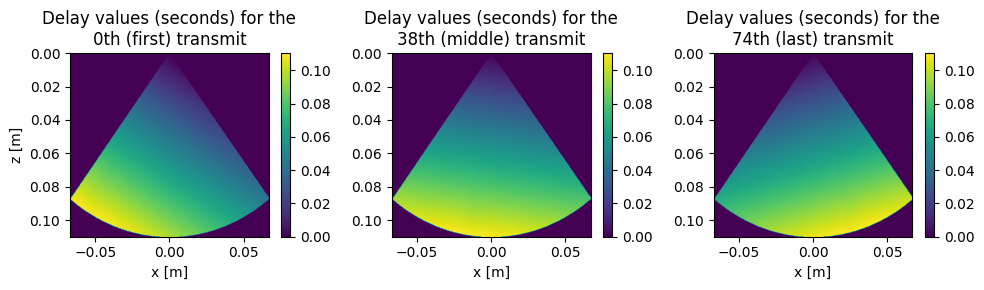

In [20]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 3))
im0 = setup.slice["transmits", 10].plot_transmitted_wavefront(postprocess=scan.scan_convert, ax=ax[0])
im1 = setup.slice["transmits", 40].plot_transmitted_wavefront(postprocess=scan.scan_convert, ax=ax[1])
im2 = setup.slice["transmits", 70].plot_transmitted_wavefront(postprocess=scan.scan_convert, ax=ax[2])
ax[0].set_title("Delay values (seconds) for the\n10th (first) transmit")
ax[1].set_title("Delay values (seconds) for the\n40th (middle) transmit")
ax[2].set_title("Delay values (seconds) for the\n70th (last) transmit")
ax[0].set_ylabel("z [m]")
for a in ax:
    a.set_xlabel("x [m]")
fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])
fig.tight_layout()

Focused transmit datasets use the Unified wavefront [1] by default. It can be a bit difficult to interpret as a virtual source delay model since it is so smooth (that's not a bad thing!). For example's sake, let's also plot the most basic virtual source model for focused transmits.

_[1] Nguyen, Nghia Q., and Richard W. Prager. ‘High-Resolution Ultrasound Imaging With Unified Pixel-Based Beamforming’. IEEE Transactions on Medical Imaging 35, no. 1 (January 2016): 98–108. https://doi.org/10.1109/TMI.2015.2456982._

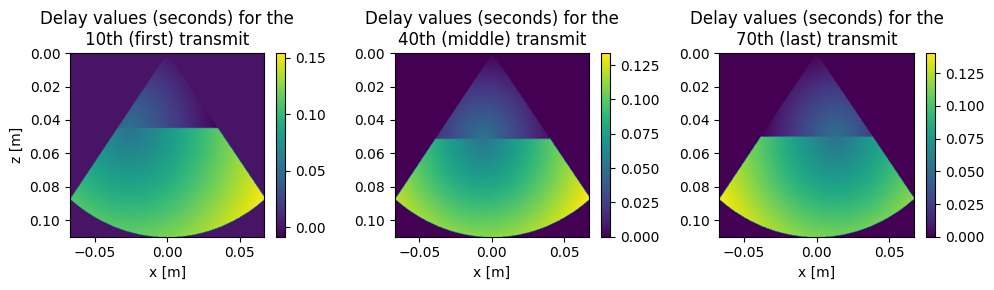

In [22]:
from vbeam.wavefront import FocusedSphericalWavefront

fig, ax = plt.subplots(ncols=3, figsize=(10, 3))
im0 = setup.slice["transmits", 10].plot_transmitted_wavefront(FocusedSphericalWavefront(), postprocess=scan.scan_convert, ax=ax[0])
im1 = setup.slice["transmits", 40].plot_transmitted_wavefront(FocusedSphericalWavefront(), postprocess=scan.scan_convert, ax=ax[1])
im2 = setup.slice["transmits", 70].plot_transmitted_wavefront(FocusedSphericalWavefront(), postprocess=scan.scan_convert, ax=ax[2])
ax[0].set_title("Delay values (seconds) for the\n10th (first) transmit")
ax[1].set_title("Delay values (seconds) for the\n40th (middle) transmit")
ax[2].set_title("Delay values (seconds) for the\n70th (last) transmit")
ax[0].set_ylabel("z [m]")
for a in ax:
    a.set_xlabel("x [m]")
fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])
fig.tight_layout()